In [2]:
pip install yfinance pandas  numpy matplotlib scikit-learn

In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [21]:
# Select stock and date range
stock_ticker = 'TSLA'  # Change to 'TSLA' if desired
start_date = '2012-01-01'
end_date = '2026-02-07'  # End before current date to simulate historical prediction

# Fetch data from Yahoo Finance
data = yf.download(stock_ticker, start=start_date, end=end_date)

# Display the first few rows to verify
print(data.head())
print(data.tail())
print(data.describe())
print(data.info())

/tmp/ipython-input-1971178914.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open    Volume
Ticker          TSLA      TSLA      TSLA      TSLA      TSLA
Date                                                        
2012-01-03  1.872000  1.966667  1.843333  1.929333  13921500
2012-01-04  1.847333  1.911333  1.833333  1.880667   9451500
2012-01-05  1.808000  1.862000  1.790000  1.850667  15082500
2012-01-06  1.794000  1.852667  1.760667  1.813333  14794500
2012-01-09  1.816667  1.832667  1.741333  1.800000  13455000
Price            Close        High         Low        Open    Volume
Ticker            TSLA        TSLA        TSLA        TSLA      TSLA
Date                                                                
2026-02-02  421.809998  427.149994  414.500000  421.290009  58739500
2026-02-03  421.959991  428.559998  413.690002  424.269989  56886500
2026-02-04  406.010010  423.899994  399.179993  420.459991  74606900
2026-02-05  397.209991  402.100006  387.529999  397.019989  72819800
2026-02-06  411.109985  414.5

In [22]:
# Select relevant features and create lagged versions
features = ['Open', 'High', 'Low', 'Volume']
data[features] = data[features].shift(1)  # Lag by 1 day

# Target is the current day's Close (which is "next" relative to lagged features)
target = 'Close'
data = data[[*features, target]]  # Keep only features and target

# Drop rows with NaN values (first row after shifting)
data = data.dropna()

# Split into features (X) and target (y)
X = data[features]
y = data[target]

# Display prepared data
print(data.head())
print(data.tail())

Price           Open      High       Low      Volume     Close
Ticker          TSLA      TSLA      TSLA        TSLA      TSLA
Date                                                          
2012-01-04  1.929333  1.966667  1.843333  13921500.0  1.847333
2012-01-05  1.880667  1.911333  1.833333   9451500.0  1.808000
2012-01-06  1.850667  1.862000  1.790000  15082500.0  1.794000
2012-01-09  1.813333  1.852667  1.760667  14794500.0  1.816667
2012-01-10  1.800000  1.832667  1.741333  13455000.0  1.841333
Price             Open        High         Low      Volume       Close
Ticker            TSLA        TSLA        TSLA        TSLA        TSLA
Date                                                                  
2026-02-02  425.350006  439.880005  422.700012  82626100.0  421.809998
2026-02-03  421.290009  427.149994  414.500000  58739500.0  421.959991
2026-02-04  424.269989  428.559998  413.690002  56886500.0  406.010010
2026-02-05  420.459991  423.899994  399.179993  74606900.0  397.209991

In [23]:
# Calculate split index
train_size = int(len(data) * 0.8)
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

# Alternatively, use train_test_split with shuffle=False for time series
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Print shapes to verify
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

Training data shape: (2835, 4), Testing data shape: (709, 4)


In [25]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

In [26]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 119.11605302407158
R-squared: 0.9853597768531813


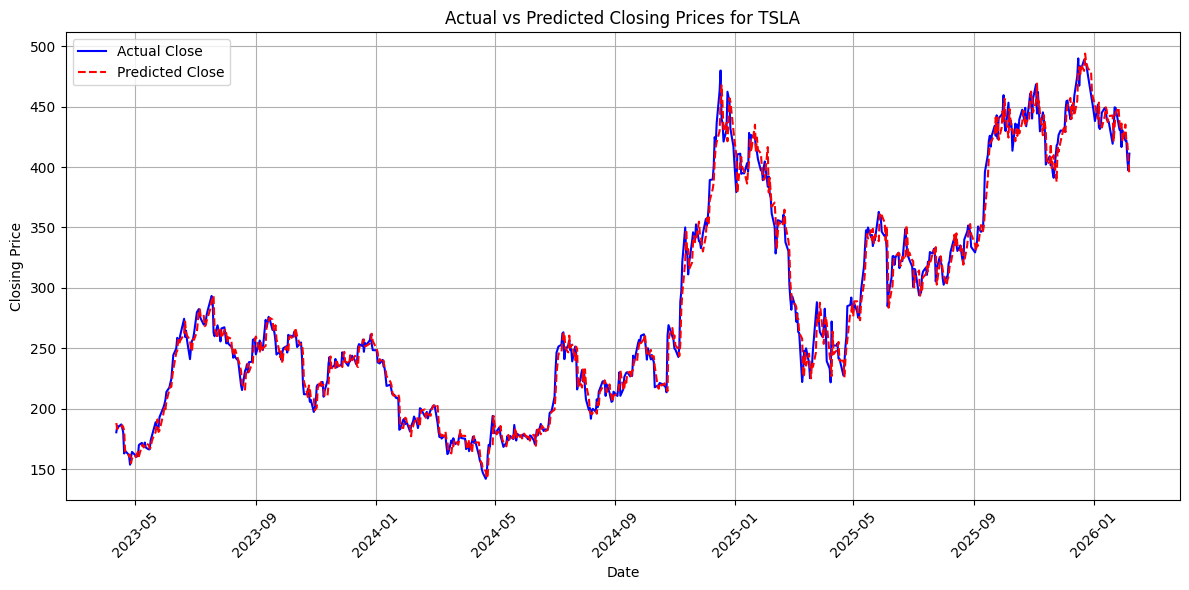

In [27]:
# Get the date index for the test set
test_dates = data.index[train_size:]

# Plot
plt.figure(figsize=(12, 6))  # Set figure size for clarity
plt.plot(test_dates, y_test, label='Actual Close', color='blue')
plt.plot(test_dates, y_pred, label='Predicted Close', color='red', linestyle='--')
plt.title(f'Actual vs Predicted Closing Prices for {stock_ticker}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)  # Add grid for readability
plt.xticks(rotation=45)  # Rotate dates for better visibility
plt.tight_layout()  # Adjust layout
plt.show()  # Or plt.savefig('prediction_plot.png') to save as image

## Final Insights
- The model was able to capture short-term trends in stock prices.
- Linear Regression performed reasonably for next-day prediction.
- Stock prices are influenced by market volatility, so predictions may vary.